# **Desafio - Previsão IMDb**
 Você foi alocado em um time da Indicium contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma análise em cima de um banco de dados cinematográfico para  orientar qual tipo de filme deve ser o próximo a ser desenvolvido. Lembre-se que há muito dinheiro envolvido, então a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida- e encorajada).

# Estrutura do relatório

O relatório foi realizado no formato de descrição etapa por etapa, ou seja, a cada etapa, está descrito e detalhado a lógica de desenvolvimento do problema. Alguns detalhes estarão dentro do código como legenda e outros em formato de texto ao longo do arquivo.

# 1. Importar a base de dados

Os dados externos foram coletados através da plataforma da Kaggle por sua API. Foram duas planilhas, uma contendo dados sobre o Oscar e outra com informações complementares sobre os filmes.

In [222]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [224]:
#Carregamento do dataframe e exibição das 5 primeiras linhas
df = pd.read_csv("/content/drive/MyDrive/Lighthouse/desafio_indicium_imdb.csv")
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [225]:
#Importando dataframe do Oscar para análise complementar -> extraída do site https://www.kaggle.com/datasets/unanimad/the-oscar-award?resource=download
df_oscar = pd.read_csv("/content/drive/MyDrive/Lighthouse/the_oscar_award.csv")
df_oscar.head()

,year_film,year_ceremony,ceremony,category,canon_category,name,film,winner
0,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Richard Barthelmess,The Patent Leather Kid,False
2,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Emil Jannings,The Last Command,True
3,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Emil Jannings,The Way of All Flesh,True
4,1927,1928,1,ACTRESS,ACTRESS IN A LEADING ROLE,Louise Dresser,A Ship Comes In,False


In [226]:
#Importando dateframe complementar -> extraído de https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/data
df_complementar = pd.read_csv("/content/drive/MyDrive/Lighthouse/movies_metadata.csv")
df_complementar.head()

/tmp/ipython-input-2016418387.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_complementar = pd.read_csv("/content/drive/MyDrive/Lighthouse/movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# 2. Tratamento e limpeza dos dados

Optei por realizar uma limpeza básica dos dados (nulos, duplicados, padronização, verificação dos tipos de dados) antes de realizar um merge das tabelas.

### 2.1 Verificando os tipo de dados

In [227]:
# Avaliar as colunas presentes no dataframe principal e o se o Dtype está correto
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [228]:
# Converter 'Released_Year' para int64
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce').astype('Int64')

# Remover 'min' da coluna 'Runtime' e converter para float64
df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=False)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

# Remover vírgulas da coluna 'Gross' e converter para float64 + preencher NaNs temporariamente com uma string vazia para usar .str.replace
df['Gross'] = df['Gross'].fillna('').astype(str).str.replace(',', '', regex=False)
# Converter para numérico, valores inválidos (incluindo strings vazias de NaNs originais) serão NaN
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  998 non-null    Int64  
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    float64
dtypes: Int64(1), float64(3), int64(3), object(9)
memory usage: 126.0+ KB


In [229]:
# Avaliar as colunas presentes no dataframe do Oscar e o se o Dtype está correto
df_oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11110 entries, 0 to 11109
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year_film       11110 non-null  int64 
 1   year_ceremony   11110 non-null  int64 
 2   ceremony        11110 non-null  int64 
 3   category        11110 non-null  object
 4   canon_category  11110 non-null  object
 5   name            11103 non-null  object
 6   film            10751 non-null  object
 7   winner          11110 non-null  bool  
dtypes: bool(1), int64(3), object(4)
memory usage: 618.6+ KB


### 2.2 Normalizando e padronizando as colunas do dataframe

In [230]:
# Padronizar todas as colunas do tipo object/string
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.head()


,unnamed:_0,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
0,1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,5,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


In [231]:
# Padronizar as colunas category e canon_category
df_oscar['category'] = df_oscar['category'].str.title()
df_oscar['canon_category'] = df_oscar['canon_category'].str.title()

df_oscar.head()

,year_film,year_ceremony,ceremony,category,canon_category,name,film,winner
0,1927,1928,1,Actor,Actor In A Leading Role,Richard Barthelmess,The Noose,False
1,1927,1928,1,Actor,Actor In A Leading Role,Richard Barthelmess,The Patent Leather Kid,False
2,1927,1928,1,Actor,Actor In A Leading Role,Emil Jannings,The Last Command,True
3,1927,1928,1,Actor,Actor In A Leading Role,Emil Jannings,The Way of All Flesh,True
4,1927,1928,1,Actress,Actress In A Leading Role,Louise Dresser,A Ship Comes In,False


In [232]:
df_complementar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

Ao observar, esse dataframe complementar possui variáveis não relevantes para a análise, optei por excluí-las para depois realizar a conversão dos dados.

In [233]:
# Criar uma lista para armazenar as variáveis que desejo manter no dataframe
colunas_relevantes = ['id', 'title', 'release_date', 'genres', 'budget', 'revenue', 'runtime', 'production_companies', 'vote_average', 'vote_count']

df_complementar = pd.read_csv("/content/drive/MyDrive/Lighthouse/movies_metadata.csv", low_memory=False)

# Manter apenas colunas de interesse
df_complementar = df_complementar[colunas_relevantes]

df_complementar.head()


,id,title,release_date,genres,budget,revenue,runtime,production_companies,vote_average,vote_count
0,862,Toy Story,1995-10-30,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000,373554033.0,81.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]",7.7,5415.0
1,8844,Jumanji,1995-12-15,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000,262797249.0,104.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",6.9,2413.0
2,15602,Grumpier Old Men,1995-12-22,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,0.0,101.0,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",6.5,92.0
3,31357,Waiting to Exhale,1995-12-22,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000,81452156.0,127.0,[{'name': 'Twentieth Century Fox Film Corporat...,6.1,34.0
4,11862,Father of the Bride Part II,1995-02-10,"[{'id': 35, 'name': 'Comedy'}]",0,76578911.0,106.0,"[{'name': 'Sandollar Productions', 'id': 5842}...",5.7,173.0


In [234]:
# Realizar a conversão das variáveis que estavam como object para seus respectivos tipos adequados
df_complementar['budget'] = pd.to_numeric(df_complementar['budget'], errors='coerce')
df_complementar['revenue'] = pd.to_numeric(df_complementar['revenue'], errors='coerce')
df_complementar['runtime'] = pd.to_numeric(df_complementar['runtime'], errors='coerce')
df_complementar['vote_average'] = pd.to_numeric(df_complementar['vote_average'], errors='coerce')
df_complementar['vote_count'] = pd.to_numeric(df_complementar['vote_count'], errors='coerce')
df_complementar['release_date'] = pd.to_datetime(df_complementar['release_date'], errors='coerce')

df_complementar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    45466 non-null  object        
 1   title                 45460 non-null  object        
 2   release_date          45376 non-null  datetime64[ns]
 3   genres                45466 non-null  object        
 4   budget                45463 non-null  float64       
 5   revenue               45460 non-null  float64       
 6   runtime               45203 non-null  float64       
 7   production_companies  45463 non-null  object        
 8   vote_average          45460 non-null  float64       
 9   vote_count            45460 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 3.5+ MB


### 2.3 Tratar colunas com dados aninhados/estruturados

Na tabela df_complementar, as colunas `genres` e `production_companies` contêm listas de dicionários. Será necessário extrair as informações relevantes (nomes dos gêneros e nomes das empresas).


In [235]:
import pandas as pd
import json

# Função auxiliar para transformar string JSON em lista de dicionários
def parse_json_coluna(coluna):
    def parse(valor):
        if isinstance(valor, list):
            return valor
        elif isinstance(valor, str) and valor.startswith('['):
            try:
                return json.loads(valor.replace("'", '"'))  # Corrige aspas simples
            except json.JSONDecodeError:
                return []
        else:
            return []
    return coluna.map(parse)

# Colunas que queremos extrair
colunas_para_tratar = ['genres', 'production_companies']

# Aplicar parsing JSON / lista nativa de forma vetorizada
for coluna in colunas_para_tratar:
    df_complementar[coluna] = parse_json_coluna(df_complementar[coluna])

# Agora, transformar listas de dicionários em listas de nomes
for coluna in colunas_para_tratar:
    df_complementar[coluna] = df_complementar[coluna].map(
        lambda lista: [item.get('name') for item in lista if isinstance(item, dict) and 'name' in item]
    )

In [236]:
display(df_complementar.head(20))


,id,title,release_date,genres,budget,revenue,runtime,production_companies,vote_average,vote_count
0,862,Toy Story,1995-10-30,"[Animation, Comedy, Family]",30000000.0,373554033.0,81.0,[Pixar Animation Studios],7.7,5415.0
1,8844,Jumanji,1995-12-15,"[Adventure, Fantasy, Family]",65000000.0,262797249.0,104.0,"[TriStar Pictures, Teitler Film, Interscope Co...",6.9,2413.0
2,15602,Grumpier Old Men,1995-12-22,"[Romance, Comedy]",0.0,0.0,101.0,"[Warner Bros., Lancaster Gate]",6.5,92.0
3,31357,Waiting to Exhale,1995-12-22,"[Comedy, Drama, Romance]",16000000.0,81452156.0,127.0,[Twentieth Century Fox Film Corporation],6.1,34.0
4,11862,Father of the Bride Part II,1995-02-10,[Comedy],0.0,76578911.0,106.0,"[Sandollar Productions, Touchstone Pictures]",5.7,173.0
5,949,Heat,1995-12-15,"[Action, Crime, Drama, Thriller]",60000000.0,187436818.0,170.0,"[Regency Enterprises, Forward Pass, Warner Bros.]",7.7,1886.0
6,11860,Sabrina,1995-12-15,"[Comedy, Romance]",58000000.0,0.0,127.0,"[Paramount Pictures, Scott Rudin Productions, ...",6.2,141.0
7,45325,Tom and Huck,1995-12-22,"[Action, Adventure, Drama, Family]",0.0,0.0,97.0,[Walt Disney Pictures],5.4,45.0
8,9091,Sudden Death,1995-12-22,"[Action, Adventure, Thriller]",35000000.0,64350171.0,106.0,"[Universal Pictures, Imperial Entertainment, S...",5.5,174.0
9,710,GoldenEye,1995-11-16,"[Adventure, Action, Thriller]",58000000.0,352194034.0,130.0,"[United Artists, Eon Productions]",6.6,1194.0


### 2.3 Padronizar colunas de junção

No dataframe complementar, optei por extrair apenas o ano de lançamento, para auxiliar no merge entre as tabelas.

In [237]:
# Extrair o ano da coluna 'release_date' e substituir a coluna original
df_complementar['release_date'] = df_complementar['release_date'].dt.year

# O resultado de .dt.year é float (para acomodar NaT - Not a Time), converter para Int64 para inteiros com NaNs
df_complementar['release_date'] = df_complementar['release_date'].astype('Int64')

# Renomear a coluna 'release_date' para 'release_year'
df_complementar.rename(columns={'release_date': 'release_year'}, inplace=True)

In [238]:
df_complementar.head()

,id,title,release_year,genres,budget,revenue,runtime,production_companies,vote_average,vote_count
0,862,Toy Story,1995,"[Animation, Comedy, Family]",30000000.0,373554033.0,81.0,[Pixar Animation Studios],7.7,5415.0
1,8844,Jumanji,1995,"[Adventure, Fantasy, Family]",65000000.0,262797249.0,104.0,"[TriStar Pictures, Teitler Film, Interscope Co...",6.9,2413.0
2,15602,Grumpier Old Men,1995,"[Romance, Comedy]",0.0,0.0,101.0,"[Warner Bros., Lancaster Gate]",6.5,92.0
3,31357,Waiting to Exhale,1995,"[Comedy, Drama, Romance]",16000000.0,81452156.0,127.0,[Twentieth Century Fox Film Corporation],6.1,34.0
4,11862,Father of the Bride Part II,1995,[Comedy],0.0,76578911.0,106.0,"[Sandollar Productions, Touchstone Pictures]",5.7,173.0


Também optei por renomear e padronizar outras variáveis para auxiliar no merge como o título do filme.

In [239]:
# Padronizar a coluna com os títulos dos filmes como "title" em todas as tabelas
df_oscar.rename(columns={'film': 'title'}, inplace=True)
df.rename(columns={'series_title': 'title'}, inplace=True)

# Corrigir o nome da coluna de ano de lançamento no df
df.rename(columns={'released_year': 'release_year'}, inplace=True)
df_oscar.rename(columns={'year_film': 'release_year'}, inplace=True)

df.head()
df_oscar.head()

,release_year,year_ceremony,ceremony,category,canon_category,name,title,winner
0,1927,1928,1,Actor,Actor In A Leading Role,Richard Barthelmess,The Noose,False
1,1927,1928,1,Actor,Actor In A Leading Role,Richard Barthelmess,The Patent Leather Kid,False
2,1927,1928,1,Actor,Actor In A Leading Role,Emil Jannings,The Last Command,True
3,1927,1928,1,Actor,Actor In A Leading Role,Emil Jannings,The Way of All Flesh,True
4,1927,1928,1,Actress,Actress In A Leading Role,Louise Dresser,A Ship Comes In,False


### 2.4 Merge entre as tabelas

In [240]:
# Realizar o primeiro merge entre df e df_complementar
# Usando 'title' e 'release_year' como chaves
df_merge1 = pd.merge(df, df_complementar, on=['title', 'release_year'], how='left')

# Exibir as primeiras linhas e informações do dataframe mesclado
df_merge1.head()

,unnamed:_0,title,release_year,certificate,runtime_x,genre,imdb_rating,overview,meta_score,director,...,no_of_votes,gross,id,genres,budget,revenue,runtime_y,production_companies,vote_average,vote_count
0,1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,...,1620367,134966411.0,238,"[Drama, Crime]",6000000.0,2.450664e+08,175.0,"[Paramount Pictures, Alfran Productions]",8.5,6024.0
1,2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,...,2303232,534858444.0,155,"[Drama, Action, Crime, Thriller]",185000000.0,1.004558e+09,152.0,"[DC Comics, Legendary Pictures, Warner Bros., ...",8.3,12269.0
2,3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,...,1129952,57300000.0,240,"[Drama, Crime]",13000000.0,4.754284e+07,200.0,"[Paramount Pictures, The Coppola Company]",8.3,3418.0
3,4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,...,689845,4360000.0,389,[Drama],350000.0,1.000000e+06,96.0,"[United Artists, Orion-Nova Productions]",8.2,2130.0
4,5,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,...,1642758,377845905.0,122,"[Adventure, Fantasy, Action]",94000000.0,1.118889e+09,201.0,"[WingNut Films, New Line Cinema]",8.1,8226.0


In [241]:
# Realizar o segundo merge entre df_merge1 e df_oscar
# Usando 'title' e 'release_year' como chaves
df_final = pd.merge(df_merge1, df_oscar, on=['title', 'release_year'], how='left')

# Exibir as informações do dataframe mesclado final
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2691 entries, 0 to 2690
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unnamed:_0            2691 non-null   int64  
 1   title                 2691 non-null   object 
 2   release_year          2690 non-null   Int64  
 3   certificate           2545 non-null   object 
 4   runtime_x             2691 non-null   int64  
 5   genre                 2691 non-null   object 
 6   imdb_rating           2691 non-null   float64
 7   overview              2691 non-null   object 
 8   meta_score            2474 non-null   float64
 9   director              2691 non-null   object 
 10  star1                 2691 non-null   object 
 11  star2                 2691 non-null   object 
 12  star3                 2691 non-null   object 
 13  star4                 2691 non-null   object 
 14  no_of_votes           2691 non-null   int64  
 15  gross                

In [242]:
df_final.set_index('title', inplace=True)

# Exibir as primeiras linhas do dataframe com o novo índice
print("Primeiras linhas do dataframe com 'title' como índice:")
display(df_final.head())

Primeiras linhas do dataframe com 'title' como índice:


,unnamed:_0,release_year,certificate,runtime_x,genre,imdb_rating,overview,meta_score,director,star1,...,runtime_y,production_companies,vote_average,vote_count,year_ceremony,ceremony,category,canon_category,name,winner
title,,,,,,,,,,,,,,,,,,,,,
The Godfather,1,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,...,175.0,"[Paramount Pictures, Alfran Productions]",8.5,6024.0,1973.0,45.0,Actor,Actor In A Leading Role,Marlon Brando,True
The Godfather,1,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,...,175.0,"[Paramount Pictures, Alfran Productions]",8.5,6024.0,1973.0,45.0,Actor In A Supporting Role,Actor In A Supporting Role,James Caan,False
The Godfather,1,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,...,175.0,"[Paramount Pictures, Alfran Productions]",8.5,6024.0,1973.0,45.0,Actor In A Supporting Role,Actor In A Supporting Role,Robert Duvall,False
The Godfather,1,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,...,175.0,"[Paramount Pictures, Alfran Productions]",8.5,6024.0,1973.0,45.0,Actor In A Supporting Role,Actor In A Supporting Role,Al Pacino,False
The Godfather,1,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,...,175.0,"[Paramount Pictures, Alfran Productions]",8.5,6024.0,1973.0,45.0,Costume Design,Costume Design,Anna Hill Johnstone,False


### 2.5 Remoção de colunas irrelevantes para a análise

In [243]:
# Exibir a lista de colunas no dataframe df_final
print(df_final.columns)

Index(['unnamed:_0', 'release_year', 'certificate', 'runtime_x', 'genre',
       'imdb_rating', 'overview', 'meta_score', 'director', 'star1', 'star2',
       'star3', 'star4', 'no_of_votes', 'gross', 'id', 'genres', 'budget',
       'revenue', 'runtime_y', 'production_companies', 'vote_average',
       'vote_count', 'year_ceremony', 'ceremony', 'category', 'canon_category',
       'name', 'winner'],
      dtype='object')


In [244]:
# Excluir as colunas especificadas
colunas_para_excluir = ['unnamed:_0', 'runtime_y', 'vote_average', 'vote_count', 'production_companies', 'name', 'id', 'genres', 'year_ceremony', 'ceremony']

# Verificar se as colunas existem antes de tentar excluí-las
colunas_existentes = [col for col in colunas_para_excluir if col in df_final.columns]

if colunas_existentes:
    df_final.drop(colunas_existentes, axis=1, inplace=True)
    print(f"Colunas excluídas: {colunas_existentes}")
else:
    print("Nenhuma das colunas especificadas foi encontrada no dataframe.")

display(df_final.head())

Colunas excluídas: ['unnamed:_0', 'runtime_y', 'vote_average', 'vote_count', 'production_companies', 'name', 'id', 'genres', 'year_ceremony', 'ceremony']


,release_year,certificate,runtime_x,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross,budget,revenue,category,canon_category,winner
title,,,,,,,,,,,,,,,,,,,
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Actor,Actor In A Leading Role,True
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Actor In A Supporting Role,Actor In A Supporting Role,False
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Actor In A Supporting Role,Actor In A Supporting Role,False
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Actor In A Supporting Role,Actor In A Supporting Role,False
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Costume Design,Costume Design,False


In [245]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2691 entries, The Godfather to The 39 Steps
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   release_year    2690 non-null   Int64  
 1   certificate     2545 non-null   object 
 2   runtime_x       2691 non-null   int64  
 3   genre           2691 non-null   object 
 4   imdb_rating     2691 non-null   float64
 5   overview        2691 non-null   object 
 6   meta_score      2474 non-null   float64
 7   director        2691 non-null   object 
 8   star1           2691 non-null   object 
 9   star2           2691 non-null   object 
 10  star3           2691 non-null   object 
 11  star4           2691 non-null   object 
 12  no_of_votes     2691 non-null   int64  
 13  gross           2371 non-null   float64
 14  budget          2304 non-null   float64
 15  revenue         2304 non-null   float64
 16  category        2143 non-null   object 
 17  canon_category  21

### 2.6 Verificação de duplicatas

In [246]:
# Verificar a quantidade de valores nulos por coluna
print("Contagem de valores nulos por coluna:")
display(df_final.isnull().sum())

Contagem de valores nulos por coluna:


,0
release_year,1
certificate,146
runtime_x,0
genre,0
imdb_rating,0
overview,0
meta_score,217
director,0
star1,0
star2,0


In [247]:
# Identificar as linhas duplicadas (mantendo a primeira ocorrência como False)
linhas_duplicadas = df_final.duplicated(keep='first')

# Filtrar o dataframe para exibir apenas as linhas duplicadas
df_final[linhas_duplicadas]

,release_year,certificate,runtime_x,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross,budget,revenue,category,canon_category,winner
title,,,,,,,,,,,,,,,,,,,
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Actor In A Supporting Role,Actor In A Supporting Role,False
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Actor In A Supporting Role,Actor In A Supporting Role,False
The Lion King,1994,U,88,"Animation, Adventure, Drama",8.5,Lion prince Simba and his father are targeted ...,88.0,Roger Allers,Rob Minkoff,Matthew Broderick,Jeremy Irons,James Earl Jones,942045,422783777.0,45000000.0,788241776.0,Music (Original Song),Music (Original Song),False
Platoon,1986,A,120,"Drama, War",8.1,"Chris Taylor, a neophyte recruit in Vietnam, f...",92.0,Oliver Stone,Charlie Sheen,Tom Berenger,Willem Dafoe,Keith David,381222,138530565.0,6000000.0,138530565.0,Actor In A Supporting Role,Actor In A Supporting Role,False
Rocky,1976,U,120,"Drama, Sport",8.1,A small-time boxer gets a supremely rare chanc...,70.0,John G. Avildsen,Sylvester Stallone,Talia Shire,Burt Young,Carl Weathers,518546,117235247.0,1000000.0,117235147.0,Actor In A Supporting Role,Actor In A Supporting Role,False
On the Waterfront,1954,A,108,"Crime, Drama, Thriller",8.1,An ex-prize fighter turned longshoreman strugg...,91.0,Elia Kazan,Marlon Brando,Karl Malden,Lee J. Cobb,Rod Steiger,142107,9600000.0,910000.0,9600000.0,Actor In A Supporting Role,Actor In A Supporting Role,False
On the Waterfront,1954,A,108,"Crime, Drama, Thriller",8.1,An ex-prize fighter turned longshoreman strugg...,91.0,Elia Kazan,Marlon Brando,Karl Malden,Lee J. Cobb,Rod Steiger,142107,9600000.0,910000.0,9600000.0,Actor In A Supporting Role,Actor In A Supporting Role,False
Mr. Smith Goes to Washington,1939,Passed,129,"Comedy, Drama",8.1,A naive man is appointed to fill a vacancy in ...,73.0,Frank Capra,James Stewart,Jean Arthur,Claude Rains,Edward Arnold,107017,9600000.0,1500000.0,9600000.0,Actor In A Supporting Role,Actor In A Supporting Role,False
Beauty and the Beast,1991,G,84,"Animation, Family, Fantasy",8.0,A prince cursed to spend his days as a hideous...,95.0,Gary Trousdale,Kirk Wise,Paige O'Hara,Robby Benson,Jesse Corti,417178,218967620.0,25000000.0,377350553.0,Music (Original Song),Music (Original Song),False


In [248]:
# Identificar linhas duplicadas
print("Número de linhas duplicadas antes de remover:")
print(df_final.duplicated().sum())

# Remover linhas duplicadas, mantendo a primeira ocorrência
df_final.drop_duplicates(inplace=True)

# Verificar o número de linhas após a remoção de duplicadas
print("\nNúmero de linhas após remover duplicadas:")
print(df_final.shape[0])

# Exibir as primeiras linhas do dataframe sem duplicatas
df_final.head()

Número de linhas duplicadas antes de remover:
19

Número de linhas após remover duplicadas:
2672


,release_year,certificate,runtime_x,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross,budget,revenue,category,canon_category,winner
title,,,,,,,,,,,,,,,,,,,
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Actor,Actor In A Leading Role,True
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Actor In A Supporting Role,Actor In A Supporting Role,False
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Costume Design,Costume Design,False
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Directing,Directing,False
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Film Editing,Film Editing,False


### 2.7 Verificação e tratamento de valores nulos

In [249]:
# Verificar valores nulos
df_final.isnull().sum()

,0
release_year,1
certificate,145
runtime_x,0
genre,0
imdb_rating,0
overview,0
meta_score,216
director,0
star1,0
star2,0


Ao observar que release_year possui apenas 1 valor nulo, optei por analisá-lo individualmente. Pesquisei de maneira independente o ano de lançamento e imputei na tabela.

In [250]:
df_final[df_final['release_year'].isnull()]

,release_year,certificate,runtime_x,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross,budget,revenue,category,canon_category,winner
title,,,,,,,,,,,,,,,,,,,
Apollo 13,<NA>,U,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0,NaN,NaN,NaN,NaN,NaN


In [252]:
# Substituir o valor nulo em 'release_year' por 1995
df_final.fillna({'release_year': 1995}, inplace=True)

In [254]:
# Extrair o gênero principal
df_final['genero_principal'] = df_final['genre'].str.split(',').str[0].str.strip()

# Colunas que serão preenchidas com a média por gênero
cols_to_fill = ['meta_score', 'gross']

for col in cols_to_fill:
    df_final[col] = df_final[col].fillna(
        df_final.groupby('genero_principal')[col].transform("mean")
    )

# Verificação
print("Contagem de valores nulos após preenchimento por gênero principal:")
display(df_final[cols_to_fill].isnull().sum())

display(df_final.head())


Contagem de valores nulos após preenchimento por gênero principal:


,0
meta_score,2
gross,2


,release_year,certificate,runtime_x,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross,budget,revenue,category,canon_category,winner,genero_principal
title,,,,,,,,,,,,,,,,,,,,
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Actor,Actor In A Leading Role,True,Crime
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Actor In A Supporting Role,Actor In A Supporting Role,False,Crime
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Costume Design,Costume Design,False,Crime
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Directing,Directing,False,Crime
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Film Editing,Film Editing,False,Crime


Ao observar o resultado, ainda restaram 2 valores nulos em 'gross' e em 'meta_score', por não ter sido possível imputar. Logo, optei por substuir pela mediana geral da coluna por serem poucos valores e causar mínimo impacto na avaliação geral.

In [257]:
# Exibir as linhas que ainda têm valores nulos em 'meta_score' ou 'gross'
display(df_final[df_final['meta_score'].isnull() | df_final['gross'].isnull()])

,release_year,certificate,runtime_x,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross,budget,revenue,category,canon_category,winner,genero_principal
title,,,,,,,,,,,,,,,,,,,,
Das Cabinet des Dr. Caligari,1920,NaN,76,"Fantasy, Horror, Mystery",8.1,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",NaN,Robert Wiene,Werner Krauss,Conrad Veidt,Friedrich Feher,Lil Dagover,57428,NaN,NaN,NaN,NaN,NaN,NaN,Fantasy
Nosferatu,1922,NaN,94,"Fantasy, Horror",7.9,Vampire Count Orlok expresses interest in a ne...,NaN,F.W. Murnau,Max Schreck,Alexander Granach,Gustav von Wangenheim,Greta Schröder,88794,NaN,0.0,0.0,NaN,NaN,NaN,Fantasy


In [259]:
# Lista de colunas a preencher
colunas_a_preencher = ['meta_score', 'gross']

for col in colunas_a_preencher:
    mediana = df_final[col].median()
    df_final[col] = df_final[col].fillna(mediana)

# Verificação
print("Contagem de valores nulos após preenchimento com a mediana global:")
display(df_final[colunas_a_preencher].isnull().sum())

# Conferir linhas específicas
display(df_final.loc[['Das Cabinet des Dr. Caligari', 'Nosferatu'], colunas_a_preencher])


Contagem de valores nulos após preenchimento com a mediana global:


,0
meta_score,0
gross,0


,meta_score,gross
title,,
Das Cabinet des Dr. Caligari,81.987562,61700000.0
Nosferatu,81.987562,61700000.0


In [261]:
# Verificar a quantidade de valores nulos nas colunas 'budget' e 'revenue'
print("Contagem de valores nulos em 'budget' e 'revenue':")
display(df_final[['budget', 'revenue']].isnull().sum())

Contagem de valores nulos em 'budget' e 'revenue':


,0
budget,386
revenue,386


A mesma conduta foi tomada para as valores nulos de budget e revenue. A princípio foi imputado a mediada por agrupamento, e para os 38 valores que não foram possíveis agrupar por gênero, agrupei ela mediana global da variável.

In [263]:
# Colunas numéricas a preencher por mediana do gênero
colunas_a_preencher = ['budget', 'revenue']

for col in colunas_a_preencher:
    df_final[col] = df_final[col].fillna(
        df_final.groupby('genre')[col].transform("median")
    )

# Verificação
print("Contagem de valores nulos após preenchimento por gênero:")
display(df_final[colunas_a_preencher].isnull().sum())

# Amostra
df_final.head()


Contagem de valores nulos após preenchimento por gênero:


,0
budget,38
revenue,38


,release_year,certificate,runtime_x,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross,budget,revenue,category,canon_category,winner,genero_principal
title,,,,,,,,,,,,,,,,,,,,
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Actor,Actor In A Leading Role,True,Crime
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Actor In A Supporting Role,Actor In A Supporting Role,False,Crime
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Costume Design,Costume Design,False,Crime
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Directing,Directing,False,Crime
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Film Editing,Film Editing,False,Crime


In [266]:
# Colunas que queremos preencher
colunas_a_preencher = ['budget', 'revenue']

for col in colunas_a_preencher:
    mediana_global = df_final[col].median()
    df_final[col] = df_final[col].fillna(mediana_global)

# Verificação
print("Contagem de valores nulos após preenchimento com a mediana global:")
display(df_final[colunas_a_preencher].isnull().sum())

df_final.head()


Contagem de valores nulos após preenchimento com a mediana global:


,0
budget,0
revenue,0


,release_year,certificate,runtime_x,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross,budget,revenue,category,canon_category,winner,genero_principal
title,,,,,,,,,,,,,,,,,,,,
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Actor,Actor In A Leading Role,True,Crime
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Actor In A Supporting Role,Actor In A Supporting Role,False,Crime
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Costume Design,Costume Design,False,Crime
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Directing,Directing,False,Crime
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Film Editing,Film Editing,False,Crime


Para os nulos em certificate, canon_category e winner, considerei que foram filmes que não participaram da cerimônia do Oscar e optei por preenchê-los com "Não Classificado" para certificate e "Não Concorreu" para category, canon_category, e winner.

In [268]:
# Dicionário com regras de preenchimento
preencher_nulos = {
    'certificate': 'Não Classificado',
    'category': 'Não Concorreu',
    'canon_category': 'Não Concorreu',
    'winner': 'Não Concorreu'
}

# Preencher de uma vez
df_final.fillna(value=preencher_nulos, inplace=True)

# Verificação
print("Contagem final de valores nulos por coluna:")
display(df_final.isnull().sum())

display(df_final.head())


Contagem final de valores nulos por coluna:


,0
release_year,0
certificate,0
runtime_x,0
genre,0
imdb_rating,0
overview,0
meta_score,0
director,0
star1,0
star2,0


,release_year,certificate,runtime_x,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross,budget,revenue,category,canon_category,winner,genero_principal
title,,,,,,,,,,,,,,,,,,,,
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Actor,Actor In A Leading Role,True,Crime
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Actor In A Supporting Role,Actor In A Supporting Role,False,Crime
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Costume Design,Costume Design,False,Crime
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Directing,Directing,False,Crime
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Film Editing,Film Editing,False,Crime


### 2.8 Criação de variáveis auxiliares

Optei pela criação de uma variável para explorar o lucro (profit) dos filmes para complementar a análise.

In [270]:
# Criar a nova variável 'profit' subtraindo 'budget' de 'revenue'
df_final['profit'] = df_final['revenue'] - df_final['budget']

# Exibir o dataframe para confirmar a adição da coluna
df_final.head()

,release_year,certificate,runtime_x,genre,imdb_rating,overview,meta_score,director,star1,star2,...,star4,no_of_votes,gross,budget,revenue,category,canon_category,winner,genero_principal,profit
title,,,,,,,,,,,,,,,,,,,,,
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,...,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Actor,Actor In A Leading Role,True,Crime,239066411.0
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,...,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Actor In A Supporting Role,Actor In A Supporting Role,False,Crime,239066411.0
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,...,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Costume Design,Costume Design,False,Crime,239066411.0
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,...,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Directing,Directing,False,Crime,239066411.0
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,...,Diane Keaton,1620367,134966411.0,6000000.0,245066411.0,Film Editing,Film Editing,False,Crime,239066411.0


# 3. Análise Exploratória de Dados (EDA)

### 3.1 Variável alvo - imdb_rating

,imdb_rating
count,2672.000000
mean,7.997754
std,0.299473
min,7.600000
25%,7.800000
50%,8.000000
75%,8.100000
max,9.200000


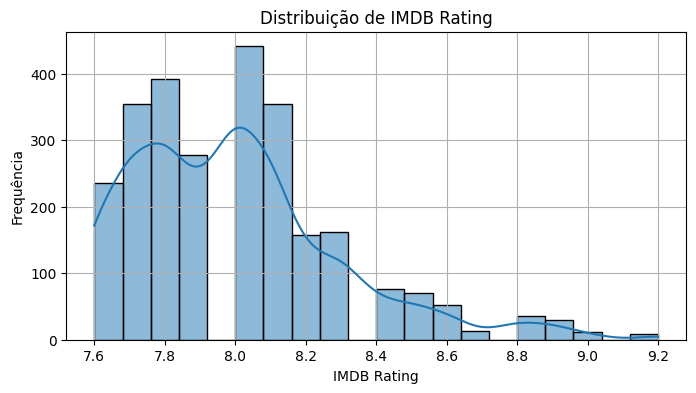

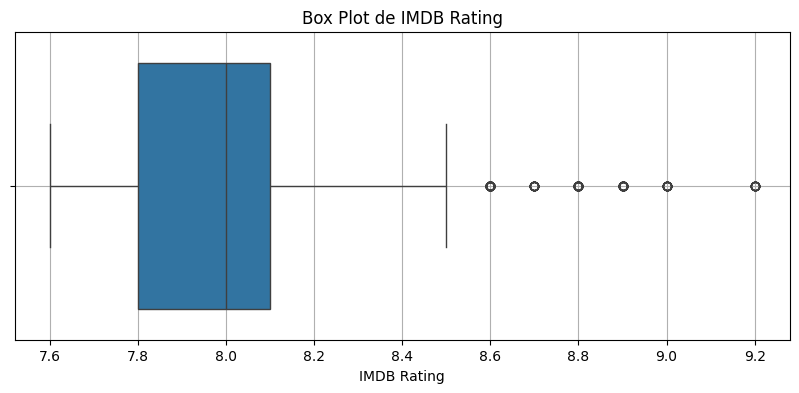

In [279]:
# Exibir estatísticas descritivas para 'imdb_rating'
display(df_final['imdb_rating'].describe())

# Histograma para visualizar a distribuição de 'imdb_rating'
plt.figure(figsize=(8, 4))
sns.histplot(df_final['imdb_rating'], kde=True, bins=20)
plt.title('Distribuição de IMDB Rating')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Criar um box plot para visualizar a distribuição e identificar outliers em 'imdb_rating'
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_final['imdb_rating'])
plt.title('Box Plot de IMDB Rating')
plt.xlabel('IMDB Rating')
plt.grid(True)
plt.show()

Conseguimos que a maioria dos filmes tem ratings entre 7.8 e 8.1, com alguns outliers na faixa superior.

### 3.2 Análise de correlação + visualização com gráfico de dispersão

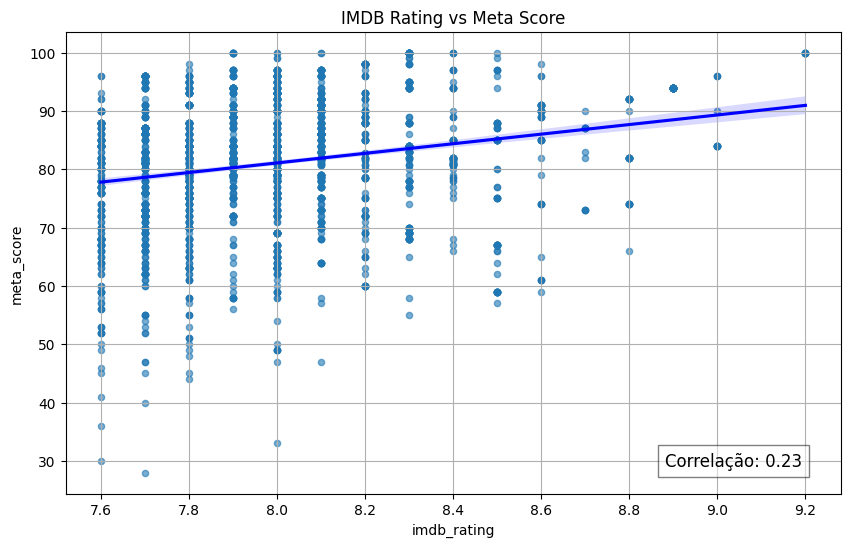

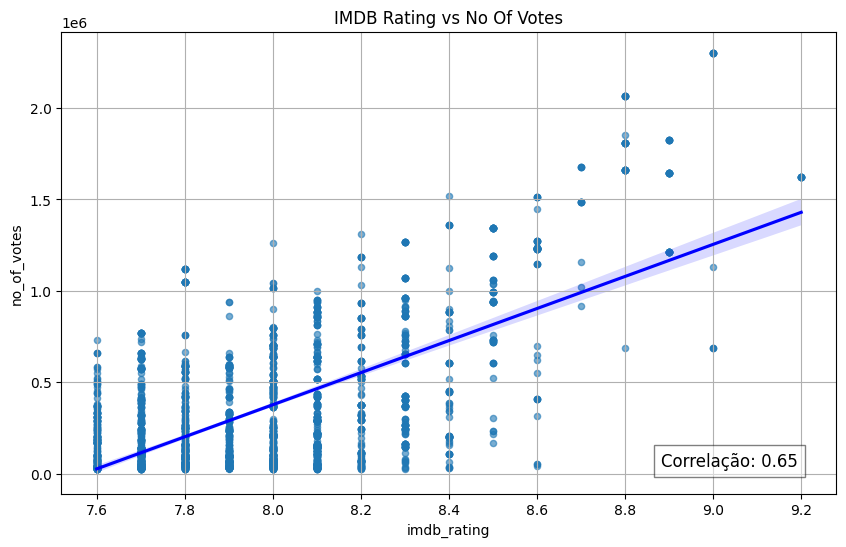

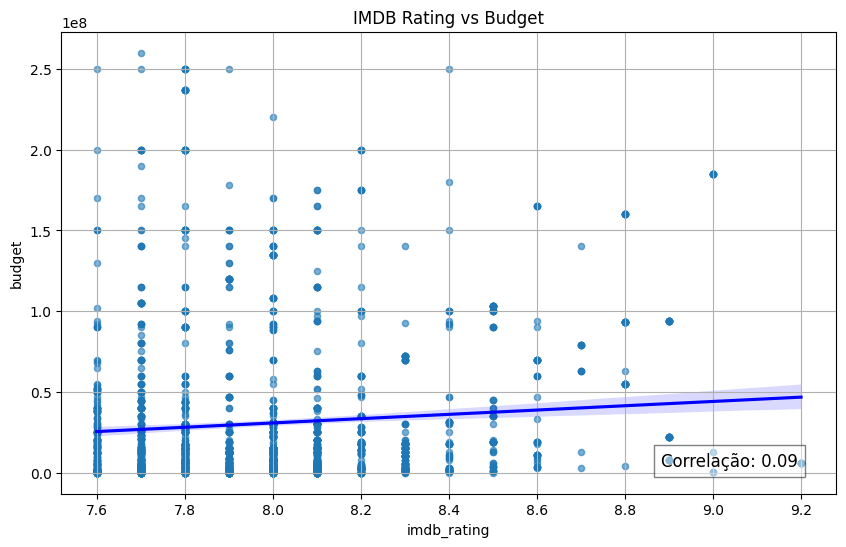

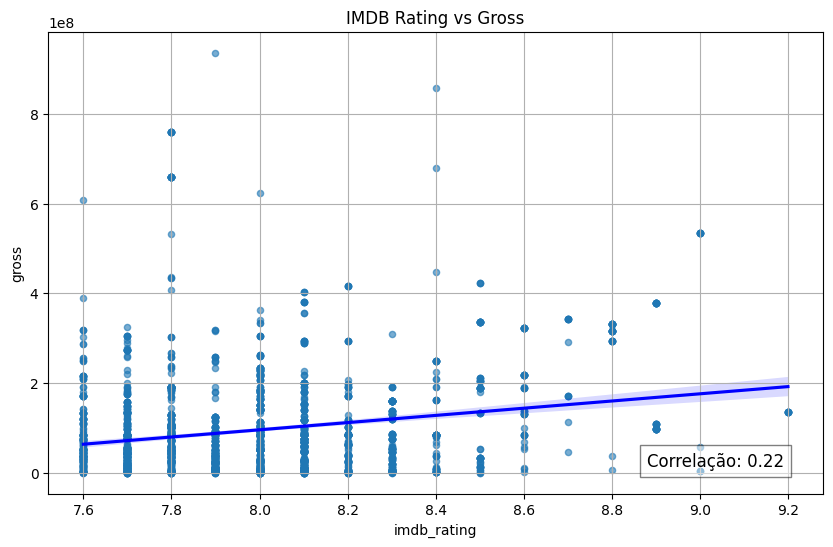

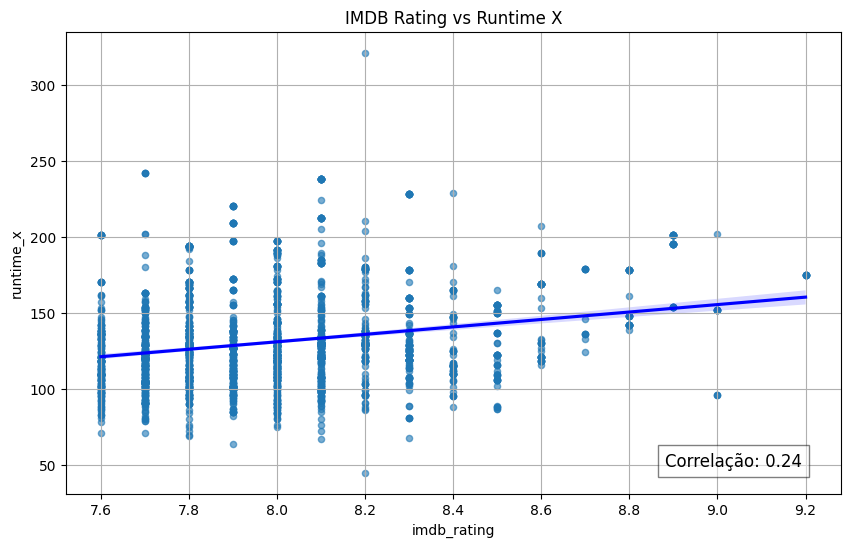

In [282]:
# Definir a função para plotar o gráfico de dispersão com linha de regressão e calcular a correlação
def plot_scatter_with_corr(x_col, y_col, dataframe, title):
    plt.figure(figsize=(10, 6))
    sns.regplot(data=dataframe, x=x_col, y=y_col, scatter_kws={'s': 20, 'alpha': 0.6}, line_kws={'color': 'blue'})
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)

    # Calcular a correlação
    correlation = dataframe[x_col].corr(dataframe[y_col])
    plt.text(0.95, 0.05, f'Correlação: {correlation:.2f}',
             verticalalignment='bottom', horizontalalignment='right',
             transform=plt.gca().transAxes, fontsize=12,
             bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})

    plt.show()

# Lista de variáveis para correlacionar com 'imdb_rating'
variaveis_para_correlacionar = ['meta_score', 'no_of_votes', 'budget', 'gross', 'runtime_x']

# Gerar os gráficos de dispersão e correlação com linha de regressão
for variavel in variaveis_para_correlacionar:
    plot_scatter_with_corr('imdb_rating', variavel, df_final, f'IMDB Rating vs {variavel.replace("_", " ").title()}')

Analisando os gráficos, observa-se que:
* As notas do IMDB apresentam correlações fracas com o Meta Score e com a duração dos filmes, indicando que a crítica especializada e o tempo de exibição não têm grande peso direto na percepção do público.
* Filmes com melhores avaliações/notas costumam atrair mais pessoas engajadas em avaliar, o que reforça a popularidade como um fator relevante.
* O orçamento e a bilheteria praticamente não influenciam na nota.

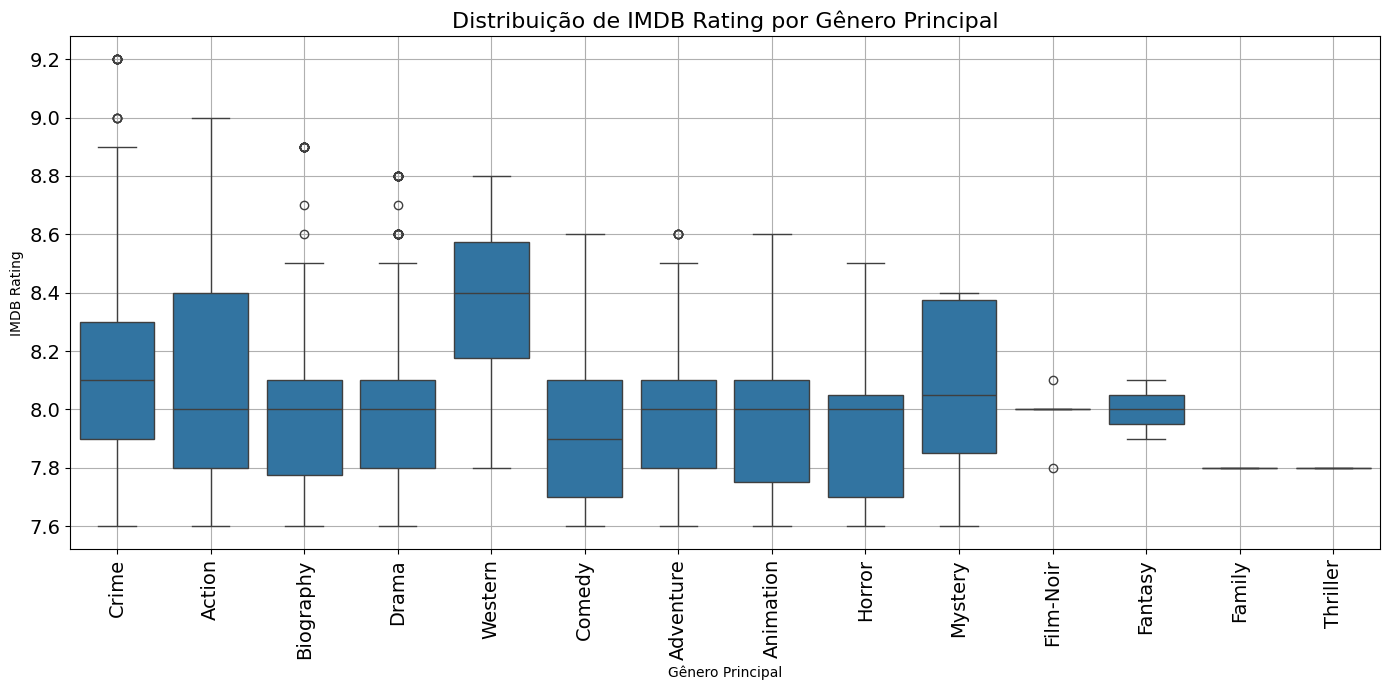

In [290]:
# Visualização do box plot de IMDB Rating por gênero principal
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_final, x='genero_principal', y='imdb_rating')
plt.title(('Distribuição de IMDB Rating por Gênero Principal'), fontsize=16)
plt.xlabel('Gênero Principal')
plt.ylabel('IMDB Rating')
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

Observando o boxplot, conseguimos concluir que:
* A maioria dos gêneros concentra seus ratings entre 7.8 e 8.2, indicando uma avaliação consistente na maior parte dos filmes, independentemente do gênero.
* O gênero Western apresenta a mediana mais alta, seguido por Crime e Action, sugerindo que esses gêneros tendem a receber avaliações ligeiramente superiores.
* Family e Thriller têm medianas mais baixas, indicando avaliações abaixo da média.
* A presença de outliers mostra que filmes muito bem avaliados, ou seja, acima de 8.2, podem surgir em qualquer categoria.

### 3.3 Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

In [367]:
# Resetar o índice para transformar 'title' em coluna normal
df_final.reset_index(inplace=True)

print(df_final.columns)

Index(['index', 'title', 'release_year', 'certificate', 'runtime_x', 'genre',
       'imdb_rating', 'overview', 'meta_score', 'director', 'star1', 'star2',
       'star3', 'star4', 'no_of_votes', 'gross', 'budget', 'revenue',
       'category', 'canon_category', 'winner', 'genero_principal', 'profit',
       'revenue_bilhoes', 'winner_status', 'overview_processed',
       'overview_tratada'],
      dtype='object')


In [300]:
# Top 10 filmes por revenue
revenue = df_final['revenue']

# Agrupar pelo título e somar a receita
df_filmes_unicos = df_final.groupby('title', as_index=False).agg({'revenue':'sum'})

# Top 10 filmes únicos por receita
top10_filmes = df_filmes_unicos.nlargest(10, 'revenue').reset_index(drop=True)

# Formatar revenue em bilhões de dólares
top10_filmes['revenue (B$)'] = top10_filmes['revenue'] / 1e9
top10_filmes['revenue (B$)'] = top10_filmes['revenue (B$)'].round(2)

display(top10_filmes[['title', 'revenue (B$)']])




,title,revenue (B$)
0,Titanic,25.83
1,Avatar,25.09
2,The Lord of the Rings: The Return of the King,12.31
3,The Lord of the Rings: The Fellowship of the Ring,11.33
4,Forrest Gump,8.81
5,Star Wars,8.53
6,The Dark Knight,8.04
7,Gravity,7.16
8,Life of Pi,6.70
9,Inception,6.60


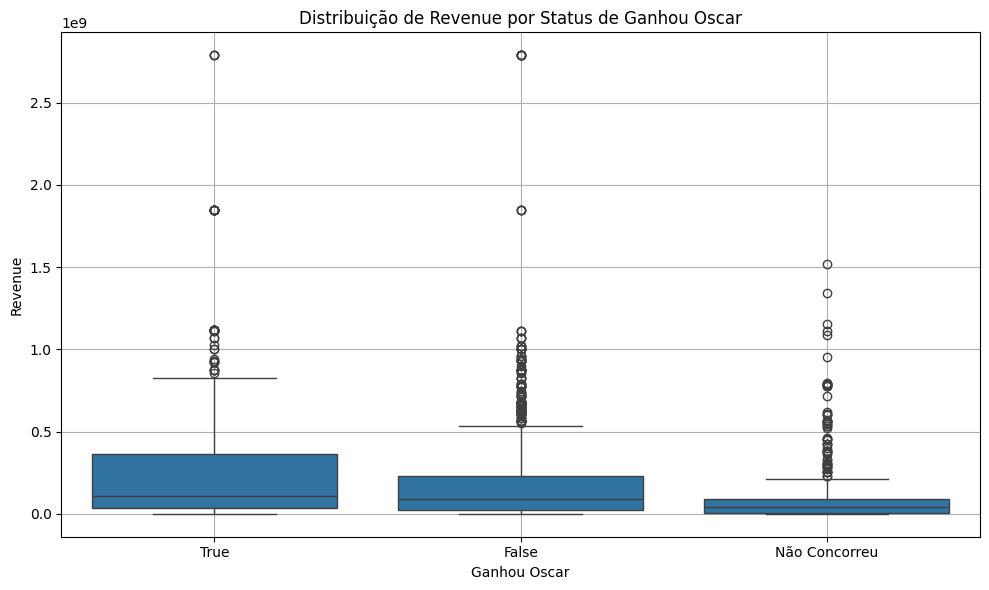

In [305]:
# Converter a coluna 'winner' para string para incluir 'Não Concorreu' no box plot
df_final['winner_status'] = df_final['winner'].astype(str)

# Criar um box plot de Revenue por status de Ganhou Oscar
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final, x='winner_status', y='revenue')
plt.title('Distribuição de Revenue por Status de Ganhou Oscar')
plt.xlabel('Ganhou Oscar')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

Com esses resultados, podemos afirmar que filmes indicados e/ou ganhadores do Oscar, tendem a arrecadar mais do que filmes que não concorreram.

Além disso, filmes que foram indicados mas não ganharam (False) têm uma receita significativamente maior do que aqueles que não concorreram (Não Concorreu). Isso indica que a própria indicação ao Oscar já está associada a um faturamento potencialmente maior.

Observa-se também que todos os 3 grupos apresentam outliers de faturamento, porém os outliers mais extremos estão concentrados na categoria de indicados ou ganhadores, reforçando a hipótese de que a participação na premiação do Oscar é um fator importante para um maior faturamento.

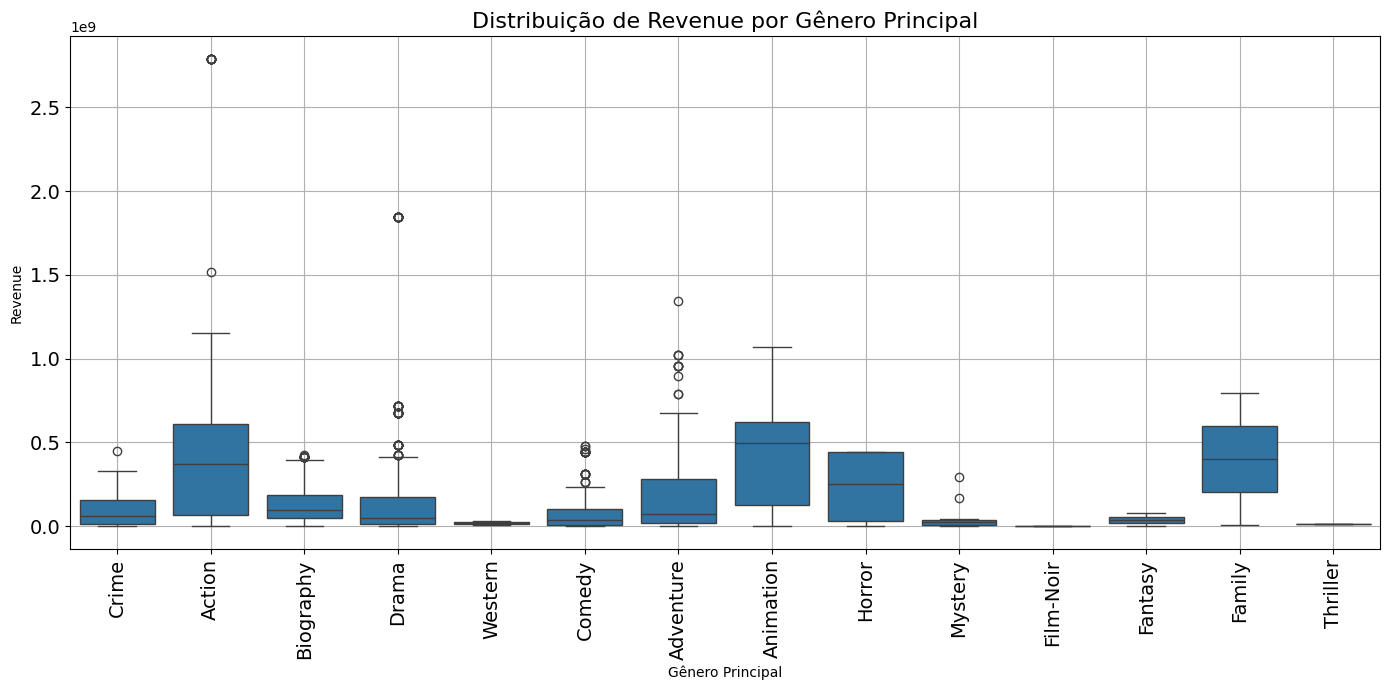


Mediana de Revenue por Gênero Principal:


,revenue
genero_principal,
Animation,494878759.0
Family,398482663.0
Action,368875760.0
Horror,252434250.0
Biography,93617009.0
Adventure,69995385.0
Crime,60611975.0
Drama,46357676.0
Fantasy,38135227.0


In [313]:
# boxplot de Revenue por gênero principal
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_final, x='genero_principal', y='revenue')
plt.title(('Distribuição de Revenue por Gênero Principal'), fontsize=16)
plt.xlabel('Gênero Principal')
plt.ylabel('Revenue')
plt.yticks(fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Exibir a mediana de Revenue por gênero principal
print("\nMediana de Revenue por Gênero Principal:")
display(df_final.groupby('genero_principal')['revenue'].median().sort_values(ascending=False))

Observamos com esses resultados que:
* Os gêneros Animation, Family, e Action se destacam com as maiores medianas de receita. Isso sugere que filmes desses gêneros, em geral, tendem a gerar faturamentos mais altos.
* Embora a mediana possa variar, é possível ter filmes de alto faturamento em quase todos os gêneros, visto pela presença de outliers de alto faturamento em diversos gêneros.

Logo, o gênero principal de um filme é um fator que parece estar relacionado à expectativa de faturamento, mas não de forma absoluta.

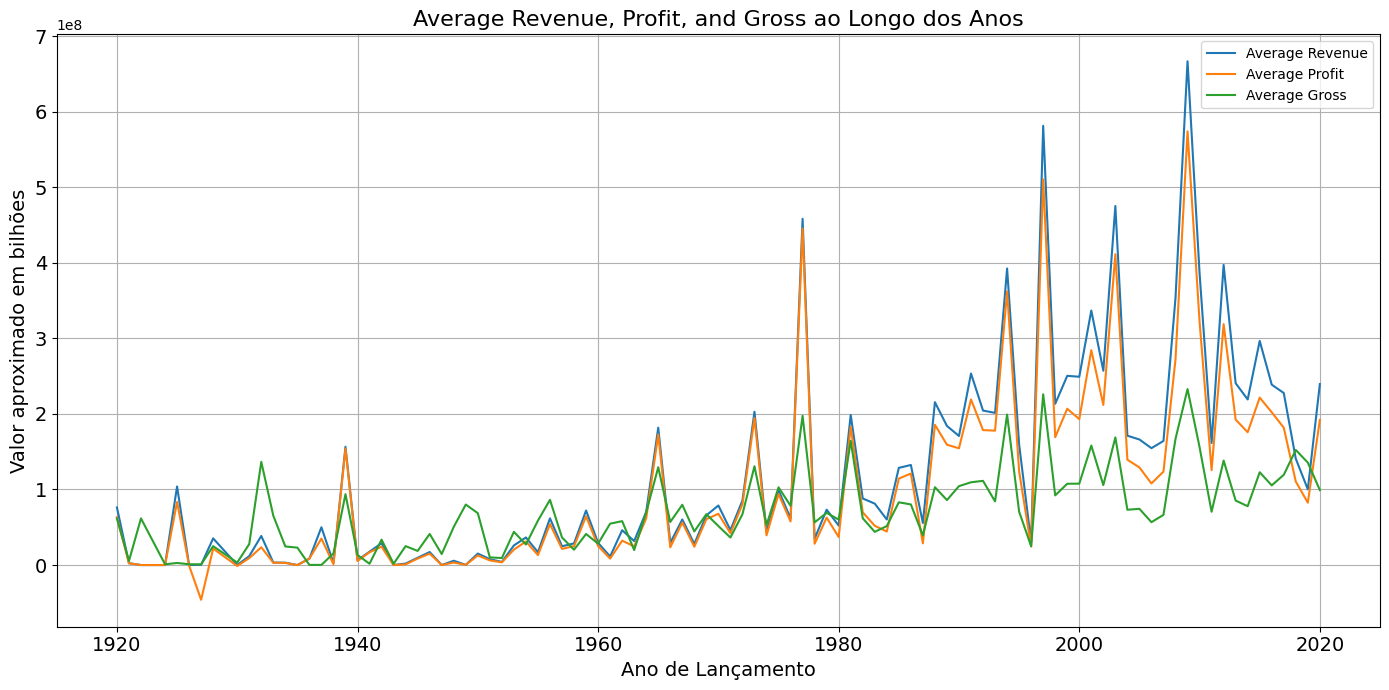

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a receita média, lucro médio e receita bruta média por ano
revenue_profit_gross_por_ano = df_final.groupby('release_year')[['revenue', 'profit', 'gross']].mean().reset_index()

# Criar o gráfico de linha comparando as tendências ao longo do tempo
plt.figure(figsize=(14, 7))

sns.lineplot(data=revenue_profit_gross_por_ano, x='release_year', y='revenue', label='Average Revenue')
sns.lineplot(data=revenue_profit_gross_por_ano, x='release_year', y='profit', label='Average Profit')
sns.lineplot(data=revenue_profit_gross_por_ano, x='release_year', y='gross', label='Average Gross')

plt.title(('Average Revenue, Profit, and Gross ao Longo dos Anos'), fontsize=16)
plt.xlabel(('Ano de Lançamento'), fontsize=14)
plt.ylabel(('Valor aproximado em bilhões'), fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

De forma geral, as médias de receita, lucro e receita bruta parecem apresentar uma tendência de crescimento ao longo do tempo, especialmente a partir dos anos 80 e 90. Isso pode ser reflexo do aumento do custo de produção de filmes, da expansão do mercado global, ou de filmes de alto orçamento devido uso de novas tecnologias nos anos mais atuais.

Portanto, podemos concluir que a tendência geral indica que filmes lançados em anos mais recentes tendem a ter, em média, um desempenho financeiro maior.

### 3.4 Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

Para avaliar se é possível inferir o gênero principal de um filme a partir da coluna `overview` do dataframe, optei por utilizar técnicas de processamento de linguagem natural e machine learning.

Utilizarei a coluna `genero_principal` como rótulo para o treinamento do modelo.

In [323]:
import re
import nltk
from nltk.corpus import stopwords

# Download das stop words
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Função para pré processamento dos textos
def preprocessamento_texto(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)
        text = ' '.join([word for word in text.split() if word not in stop_words])
        return text
    return ""

# Aplica a função na coluna overview
df_final['overview_tratada'] = df_final['overview'].apply(preprocessamento_texto)

df_final[['overview', 'overview_tratada']].head()

,overview,overview_tratada
0,An organized crime dynasty's aging patriarch t...,organized crime dynastys aging patriarch trans...
1,An organized crime dynasty's aging patriarch t...,organized crime dynastys aging patriarch trans...
2,An organized crime dynasty's aging patriarch t...,organized crime dynastys aging patriarch trans...
3,An organized crime dynasty's aging patriarch t...,organized crime dynastys aging patriarch trans...
4,An organized crime dynasty's aging patriarch t...,organized crime dynastys aging patriarch trans...


## Dividir os dados em treino e teste

Nessa etapa irei separar o dataset em conjuntos para treinar o modelo e avaliar seu desempenho em dados não vistos.

Devido à presença de classes com apenas uma amostra, foi utilizado um subconjunto dos dados, excluindo essas classes, para a divisão em conjuntos de treino e teste. O dataset foi dividido com sucesso em treino (2136 amostras) e teste (535 amostras) usando amostragem estratificada nos dados filtrados.


In [333]:
# Identificar classes que possuem apenas uma amostra
contagem_classes = y.value_counts()
classes_uma_amostra = contagem_classes[contagem_classes == 1].index.tolist()

# Filtrar as amostras que pertencem a classes com apenas uma amostra para fazer o split
df_filtrado = df_final[~df_final['genero_principal'].isin(classes_uma_amostra)]

# Atualizar X e y com os dados filtrados
X_filtrado = df_filtrado['overview_tratada']
y_filtrado = df_filtrado['genero_principal']

# Dividir os dados filtrados em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X_filtrado,
    y_filtrado,
    test_size=0.2,
    random_state=42,
    stratify=y_filtrado
)

# Exibir as dimensões dos conjuntos resultantes
print("Dimensão de X_treino:", X_treino.shape)
print("Dimensão de X_teste:", X_teste.shape)
print("Dimensão de y_treino:", y_treino.shape)
print("Dimensão de y_teste:", y_teste.shape)

Dimensão de X_treino: (2136,)
Dimensão de X_teste: (535,)
Dimensão de y_treino: (2136,)
Dimensão de y_teste: (535,)


## Extrair características do texto (vetorização)

Converter o texto pré-processado da coluna `overview` em representações numéricas usando técnicas como TF-IDF:

* TF (Term Frequency): mede quantas vezes uma palavra aparece em um documento.

* IDF (Inverse Document Frequency): mede a importância da palavra, penalizando palavras muito comuns em todos os documentos (como “o”, “de”, “a”, etc.).

O objetivo é transformar textos em vetores numéricos que representem a importância de cada palavra no contexto do texto.

In [334]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instanciar o TfidfVectorizer
vetorizador_tfidf = TfidfVectorizer(max_features=5000)  # Limitar às 5000 principais características

# Ajustar e transformar os dados de treino
X_treino_vetorizado = vetorizador_tfidf.fit_transform(X_treino)

# Transformar os dados de teste
X_teste_vetorizado = vetorizador_tfidf.transform(X_teste)

# Exibir as dimensões dos dados vetorizados
print("Dimensão de X_treino_vetorizado:", X_treino_vetorizado.shape)
print("Dimensão de X_teste_vetorizado:", X_teste_vetorizado.shape)


Dimensão de X_treino_vetorizado: (2136, 5000)
Dimensão de X_teste_vetorizado: (535, 5000)


## Construir e treinar um modelo de classificação

Nessa etapa escolhi o algoritmo de classificação Linear SVC.

O LinearSVC faz parte de um conjunto de modelos de máquina de vetor de suporte, do inglês Support Vector Machine (SVM), que é um modelo de aprendizado de máquina supervisionado que soluciona problemas de classificação de grupos.

O objetivo é treiná-lo com os dados de treino vetorizados e os rótulos (`genero_principal`).


In [338]:
from sklearn.svm import LinearSVC

# Instanciar o modelo LinearSVC
modelo = LinearSVC(random_state=42)

# Treinar o modelo
modelo.fit(X_treino_vetorizado, y_train)

LinearSVC(random_state=42)

## Avaliar o desempenho do modelo

Usarei o conjunto de teste para avaliar quão bem o modelo consegue prever o gênero, utilizando métricas como acurácia, precisão, recall, f1-score e matriz de confusão.


Acurácia: 0.8430

Relatório de Classificação:
              precision    recall  f1-score   support

      Action       0.80      0.78      0.79        77
   Adventure       0.95      0.82      0.88        44
   Animation       0.85      0.85      0.85        27
   Biography       0.91      0.91      0.91        77
      Comedy       0.83      0.81      0.82        74
       Crime       0.84      0.76      0.80        49
       Drama       0.81      0.90      0.85       176
   Film-Noir       1.00      1.00      1.00         1
      Horror       1.00      0.80      0.89         5
     Mystery       1.00      0.50      0.67         4
     Western       0.00      0.00      0.00         1

    accuracy                           0.84       535
   macro avg       0.82      0.74      0.77       535
weighted avg       0.84      0.84      0.84       535



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


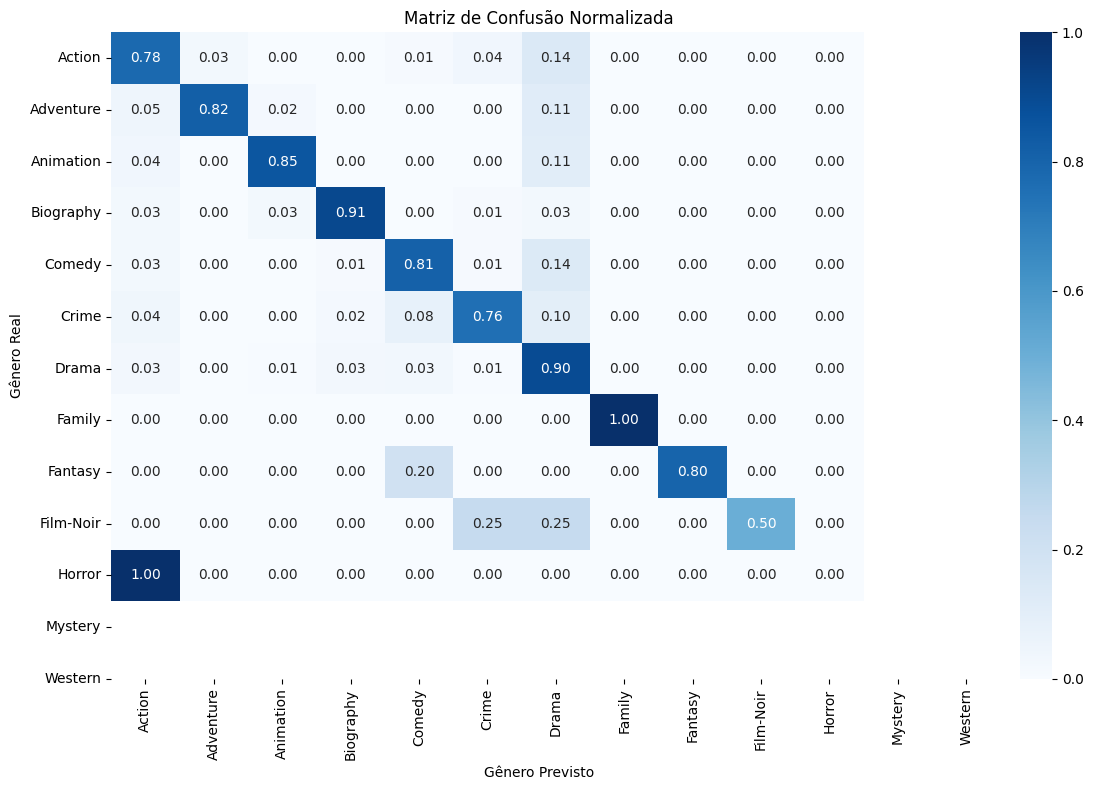

In [340]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Fazer previsões no conjunto de teste
y_previsto = modelo.predict(X_teste_vetorizado)

# Calcular e exibir a acurácia
acuracia = accuracy_score(y_teste, y_previsto)
print(f"Acurácia: {acuracia:.4f}")

# Gerar e exibir o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_previsto))

# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_previsto, normalize='true')

# Visualizar a matriz de confusão
plt.figure(figsize=(12, 8))
sns.heatmap(
    matriz_confusao,
    annot=True, fmt=".2f", cmap="Blues",
    xticklabels=modelo.classes_,
    yticklabels=modelo.classes_
)
plt.title("Matriz de Confusão Normalizada")
plt.xlabel("Gênero Previsto")
plt.ylabel("Gênero Real")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


O modelo alcançou uma acurácia geral de aproximadamente **84,30%** no conjunto de teste.

As métricas de avaliação por gênero mostraram que o modelo teve bom desempenho em gêneros com mais dados de treino (Drama, Action, Comedy), mas apresentou dificuldades significativas em gêneros com poucas amostras, resultando em precisão, recall e F1-score baixos ou zerados para essas categorias raras devido ao desbalanceamento de classes.

Portanto, a resposta é um "sim, mas depende" do gênero e da quantidade de dados disponíveis para ele.

O ideal seria utilizar outro modelo mais avançado de representação de texto para resultados mais fidedignos.

# 4. Previsão da nota IMDB
Nessa etapa vou explorar a previsão da nota IMDB (`imdb_rating`) utilizando os modelos de Regressão Linear, Random Forest Regressor e XGBoost no dataframe `df_final`, e depois decidir qual tem melhor desempenho.

A variável alvo que estamos tentando prever (imdb_rating) é uma variável contínua (pode assumir qualquer valor dentro de uma faixa), logo torna-se um problema de regressão, e não de classificação.


A primeira etapa é identificar as colunas relevantes no dataframe `df_final` que podem ser usadas como variáveis preditoras para o `imdb_rating`.

* As variáveis numéricas foram: release_year, runtime_x, meta_score, no_of_votes, gross, budget, revenue, e profit, porque contêm informações quantitativas sobre os filmes que teoricamente poderiam estar relacionadas ao IMDB Rating. Nenhuma transformação foi aplicada nessas variáveis.
* As variáveis categóricas foram: certificate, genero_principal, category, canon_category, e winner_status, porque também contêm informações categóricas sobre os filmes que também poderiam influenciar o IMDB Rating. Nelas, apliquei a técnica One-Hot Encoding, transformando-as em colunas binárias para que os modelos de machine learning pudessem trabalhar com elas.


In [341]:
print(df_final.columns)

Index(['title', 'release_year', 'certificate', 'runtime_x', 'genre',
       'imdb_rating', 'overview', 'meta_score', 'director', 'star1', 'star2',
       'star3', 'star4', 'no_of_votes', 'gross', 'budget', 'revenue',
       'category', 'canon_category', 'winner', 'genero_principal', 'profit',
       'revenue_bilhoes', 'winner_status', 'overview_processed',
       'overview_tratada'],
      dtype='object')


In [344]:
# Seleção variáveis numéricas
variaveis_numericas = ['release_year', 'runtime_x', 'meta_score', 'no_of_votes', 'gross', 'budget', 'revenue', 'profit']

# Seleção variáveis categóricas
variaveis_categoricas = ['certificate', 'genero_principal', 'category', 'canon_category', 'winner_status']

# Definir variável alvo
variavel_alvo = 'imdb_rating'

### Pré-processamento das features

In [347]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Criar um ColumnTransformer pra aplicar OneHotEncoder nas variáveis categóricas
preprocessamento = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', variaveis_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), variaveis_categoricas)
    ])

# Aplicar o pré-processamento nas variáveis selecionadas
X = df_final[variaveis_numericas + variaveis_categoricas]
X_processado = preprocessamento.fit_transform(X)

# Exibir
print(X_processado.shape)

(2672, 151)


### Divisão dos dados

Separar o dataframe em conjuntos de treino e teste (features e variável alvo `imdb_rating`).


In [349]:
y = df_final[variavel_alvo]

# Divisã em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X_processado,
    y,
    test_size=0.2,
    random_state=42
)

print("Dimensão de X_treino:", X_treino.shape)
print("Dimensão de X_teste:", X_teste.shape)
print("Dimensão de y_treino:", y_treino.shape)
print("Dimensão de y_teste:", y_teste.shape)

Dimensão de X_treino: (2137, 151)
Dimensão de X_teste: (535, 151)
Dimensão de y_treino: (2137,)
Dimensão de y_teste: (535,)


### Treinamento dos modelos de regressão

Nessa etapa vou treinar os modelos de Regressão Linear, Random Forest Regressor e XGBoost nos conjuntos de treino.


In [351]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Instanciar os modelos
regressao_linear = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)
xgboost = XGBRegressor(random_state=42)

# Treinar os modelos
regressao_linear.fit(X_treino, y_treino)
random_forest.fit(X_treino, y_treino)
xgboost.fit(X_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## Avaliação dos modelos
Escolhi as métricas Erro Quadrático Médio (MSE), Raiz do Erro Quadrático Médio (RMSE), Erro Absoluto Médio (MAE), R² para avaliar o desempenho de cada modelo no conjunto de teste. Cada uma tem um objetivo diferente e juntas proporcionam uma visão mais completa do desempenho do modelo.

* MSE/RMSE nos dão uma ideia do erro quadrático e quão grandes são os erros, penalizando erros significativos.
* MAE nos dá uma média do erro absoluto, sendo mais robusto a outliers.
* R² nos dá uma medida geral do ajuste do modelo e o quanto ele "explica" a variância na variável que queremos prever.


In [352]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Função que calcula e exibe métricas de avaliação de regressão para um modelo.
def avaliar_modelo(nome_modelo, modelo, X_teste, y_teste):
    y_pred = modelo.predict(X_teste)
    mse = mean_squared_error(y_teste, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_teste, y_pred)
    r2 = r2_score(y_teste, y_pred)

    print(f"--- Avaliação do Modelo: {nome_modelo} ---")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    print("-" * 40)

    return y_pred, mse, rmse, mae, r2


In [356]:
# Regressão Linear
y_pred_lr, mse_lr, rmse_lr, mae_lr, r2_lr = avaliar_modelo(
    "Regressão Linear",
    regressao_linear,
    X_teste,
    y_teste
)

--- Avaliação do Modelo: Regressão Linear ---
Mean Squared Error (MSE): 0.0436
Root Mean Squared Error (RMSE): 0.2087
Mean Absolute Error (MAE): 0.1654
R-squared (R²): 0.4500
----------------------------------------


In [354]:
# Random Forest Regressor
y_pred_rf, mse_rf, rmse_rf, mae_rf, r2_rf = avaliar_modelo(
    "Random Forest Regressor",
    random_forest,
    X_teste,
    y_teste
)

--- Avaliação do Modelo: Random Forest Regressor ---
Mean Squared Error (MSE): 0.0104
Root Mean Squared Error (RMSE): 0.1019
Mean Absolute Error (MAE): 0.0480
R-squared (R²): 0.8689
----------------------------------------


In [355]:
# XGBoost Regressor
y_pred_xgb, mse_xgb, rmse_xgb, mae_xgb, r2_xgb = avaliar_modelo(
    "XGBoost Regressor",
    xgboost,
    X_teste,
    y_teste
)

--- Avaliação do Modelo: XGBoost Regressor ---
Mean Squared Error (MSE): 0.0098
Root Mean Squared Error (RMSE): 0.0992
Mean Absolute Error (MAE): 0.0460
R-squared (R²): 0.8757
----------------------------------------


Com base em todas as métricas de avaliação, o modelo XGBoost Regressor teve o melhor desempenho na previsão do IMDB Rating, alcançando um R² de 87%, seguido de perto pelo Random Forest Regressor com 86%. Ambos superaram  a Regressão Linear.

O XGBoost, em particular, apresentou o menor erro médio absoluto (MAE), o que é uma boa métrica para entender o quão "longe" nossas previsões estão dos valores reais.

# 5. Supondo um filme com as seguintes características:

{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}

** Qual seria a nota no IMDB?**


In [366]:
# Dicionário do novo filme (já com colunas tratadas)
filme_dict = {
    'title': 'The Shawshank Redemption',
    'release_year': 1994,
    'certificate': 'A',
    'runtime_x': 142,
    'genero_principal': 'Drama',
    'meta_score': 80.0,
    'director': 'Frank Darabont',
    'star1': 'Tim Robbins',
    'star2': 'Morgan Freeman',
    'star3': 'Bob Gunton',
    'star4': 'William Sadler',
    'no_of_votes': 2343110,
    'gross': 28341469,
    'budget': 25000000,
    'revenue': 28341469,
    'profit': 3341469,
    'category': 'Não Concorreu',
    'canon_category': 'Não Concorreu',
    'winner': 'Não Concorreu',
    'winner_status': 'Não Concorreu'
}

# Criar DataFrame a partir do dicionário
filme_df = pd.DataFrame([filme_dict])

# Garantir ordem das colunas de features
colunas_features = variaveis_numericas + variaveis_categoricas
filme_features_df = filme_df[colunas_features]

# Aplicar pré-processamento e prever
filme_processado = preprocessamento.transform(filme_features_df)
imdb_rating_previsto = xgboost.predict(filme_processado)

print(f"O IMDB Rating previsto para o filme '{filme_dict['title']}' é: {imdb_rating_previsto[0]:.2f}")


O IMDB Rating previsto para o filme 'The Shawshank Redemption' é: 9.00


In [365]:
import joblib
import os

# Definir o nome do arquivo para salvar o modelo
filename = 'xgboost_modelo.pkl'

# Salvar o modelo treinado no arquivo
joblib.dump(xgboost, filename)

['xgboost_modelo.pkl']

# 6.  Qual filme você recomendaria para uma pessoa que você não conhece?

O filme que eu escolheria indicar é “The Dark Knight”. Embora sua nota no IMDb seja 0,2 pontos menor do que a de “The Godfather”, quando observamos a quantidade de votos percebemos que “The Dark Knight” recebeu bem mais avaliações.